In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

# Question-1

In [10]:
def CSF(
    size: Tuple[float, float], resolution: Tuple[int, int], available_distance: float
) -> float:
    """
    Contrast Sensitiity Function

    Args:
        size (Tuple[float, float]): Size of the Television in inches
        resolution (Tuple[int, int]): Resolution of the telivision (Example (1920 x 1080))
        available_distance (float): Available distance

    Returns:
        float: the optimal distance in inches

    Raises:
        ValueError: if the required distance is more than the available distance
    """
    
    pxl_width = min(size[0]/resolution[0], size[1]/resolution[1])
    # 6 cycles -> 12 pixels in 1 degree
    # 6 pxls in 0.5 degree
    tan_half = np.tan( 0.5 * np.pi / 180 )
    opt_length = 6 * pxl_width / tan_half
    if opt_length > available_distance:
        raise ValueError("Required Length more than available")
    return opt_length


CSF((55, 36), (1920, 1080), 120)

19.694924240975087

# Question-2

### a

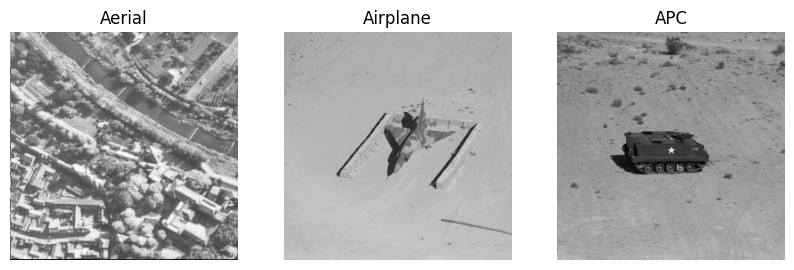

In [19]:
images = {
    'Aerial': '5.1.10',
    'Airplane': '7.1.02',
    'APC': '7.1.08'
}

titles, paths = [k for k in images], [images[k] for k in images]

fig, ax = plt.subplots(1,3, figsize=(10, 3))
for idx, (title, path) in enumerate(zip(titles, paths)):
    img = plt.imread(f'Images/{path}.tiff')
    ax[idx].imshow(img, cmap='gray')
    ax[idx].set_title(title)
    ax[idx].axis('off')
plt.show()
        

### b

In [32]:
for idx, (title, path) in enumerate(zip(titles, paths)):
    img = plt.imread(f'Images/{path}.tiff')
    max = np.max(img)
    min = np.min(img)
    height, width = img.shape
    bits = np.ceil(np.log2(max-min+1e-6))
    print(f'{title}\n{"-"*10}\nMax: {max}\nMin: {min}\nHeight: {height}\nWidth: {width}\nResolution: {width}x{height}\nBits required: {bits}\n')

Aerial
----------
Max: 248
Min: 1
Height: 256
Width: 256
Resolution: 256x256
Bits required: 8.0

Airplane
----------
Max: 250
Min: 3
Height: 512
Width: 512
Resolution: 512x512
Bits required: 8.0

APC
----------
Max: 215
Min: 12
Height: 512
Width: 512
Resolution: 512x512
Bits required: 8.0



In [31]:
import os
for idx, (title, path) in enumerate(zip(titles, paths)):
    print(f'Size of {title} image (in KB) on my disk is: ', end='')
    os.system(f'du -sk Images/{path}.tiff | cut -f1')

Size of Aerial image (in KB) on my disk is: 68
Size of Airplane image (in KB) on my disk is: 260
Size of APC image (in KB) on my disk is: 260


In [34]:
def compression_ratio(path):
    actual_size = os.stat(f'./Images/{path}.tiff').st_size
    img = plt.imread(f'./Images/{path}.tiff')
    uncompressed_size = img.size
    return actual_size / uncompressed_size

for idx, (title, path) in enumerate(zip(titles, paths)):
    print(f'Compression Ratio for {title} is {compression_ratio(path)}')
    

Compression Ratio for Aerial is 1.002044677734375
Compression Ratio for Airplane is 1.0005111694335938
Compression Ratio for APC is 1.0005111694335938


The ratios are above one because Tiff files are often uncompressed, some data is required to tell the file type, image dimensions etc. This is why the compression ratio is above 1.

It can be confirmed that these files are uncompressed using `exiftool -compression {file_name}`

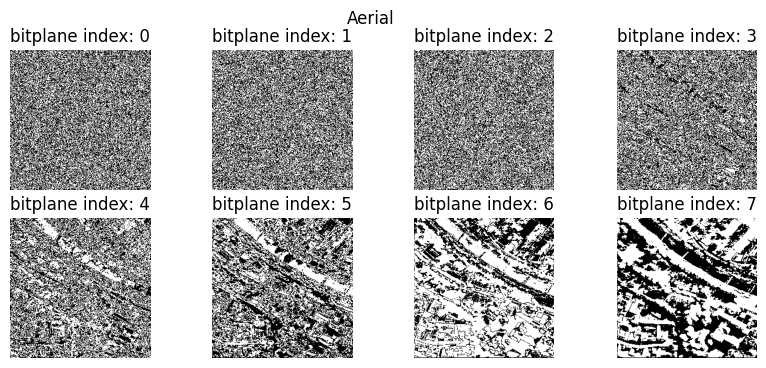

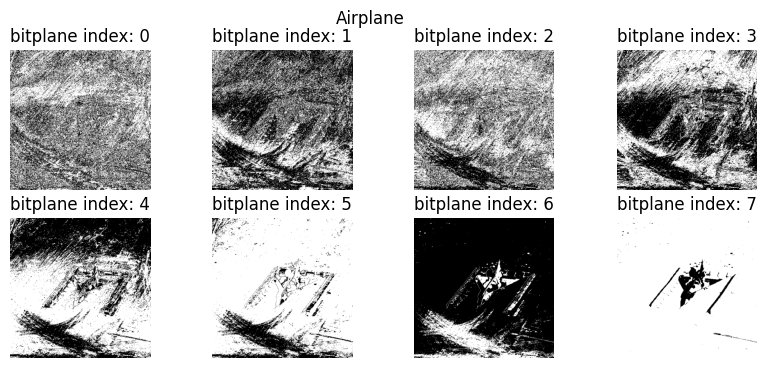

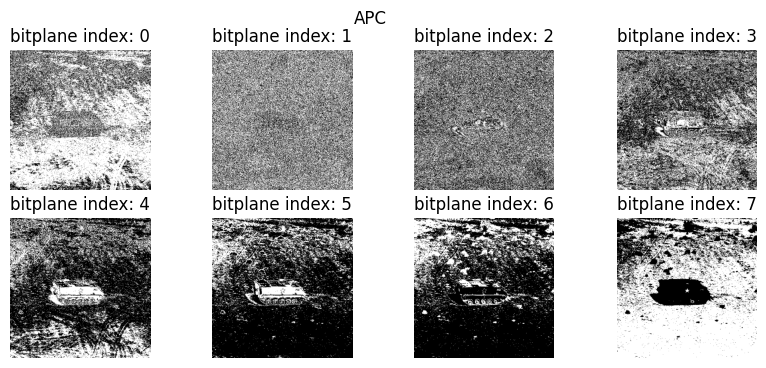

In [44]:
def display_bit_plane(img: np.ndarray, bitplane_index: int):
    img = np.bitwise_and(img, 1<<bitplane_index)
    return img

for idx, (title, path) in enumerate(zip(titles, paths)):
    fig, ax = plt.subplots(2, 4, figsize=(10, 4))
    ax = np.r_[ax[0], ax[1]] # flattening the subaxis array
    img = plt.imread(f'./Images/{path}.tiff')
    for b in range(8):
        ax[b].imshow(display_bit_plane(img, b), cmap='gray')
        ax[b].set_title(f'bitplane index: {b}')
        ax[b].axis('off')
    fig.suptitle(f'{title}')
        
        

In [36]:
images = {
    'Airplane': '7.1.02',
    'Truck': '7.1.01',
    'Airport': '5.3.02',
    'APC': '7.1.08'
}